In [1]:
import pickle
from meanderutils import *
import scipy.special
from numba import jit
from scipy.optimize import curve_fit
from styles import *
import matplotlib
#batching_error = error


{'rblinkcolor': '#124984', 'rbblue': '#124984', 'rbprimarycolor': '#C43B3C', 'rbbluea': '#21114E', 'rbblueb': '#26447A', 'rbbluec': '#297393', 'rbblued': '#4EA2A4', 'rbbluee': '#9ACBBA', 'rbbluef': '#EBF3EF', 'rbrbluea': '#EEF5FC', 'rbrblueb': '#CADEF0', 'rbrbluec': '#91C3DE', 'rbrblued': '#4D99CA', 'rbrbluee': '#1C6BB0', 'rbrbluef': '#083C7D', 'rblightgray': '#D5D5D5', 'rbdarkgray': '#343434', 'rbsecondarycolor': '#91C3DE'}


In [2]:
q = 2.0

size_data = {1.0: [128, 256, 512, 1024, 2048],
             2.0: [128, 256, 512], # , 4096, 8192
             4.0: [128, 256, 512]}

# size_data = {2.0: [128, 256, 512, 1024, 2048, 4096],
#              2.1: [256, 512, 1024, 2048, 4096],
#              2.2: [256, 512, 1024, 2048, 4096],
#              2.3: [256, 512, 1024, 2048, 4096],
#              2.4: [256, 512, 1024, 2048, 4096]}

/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_41059/4256224525.py:40: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, hist_arr/np.sum(hist_arr))
/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_41059/4256224525.py:45: RuntimeWarning: invalid value encountered in true_divide
  max_value = max(max_value, np.max(hist_arr/np.sum(hist_arr)))


[-0.00927734 -0.00341797 -0.00146484  0.        ]


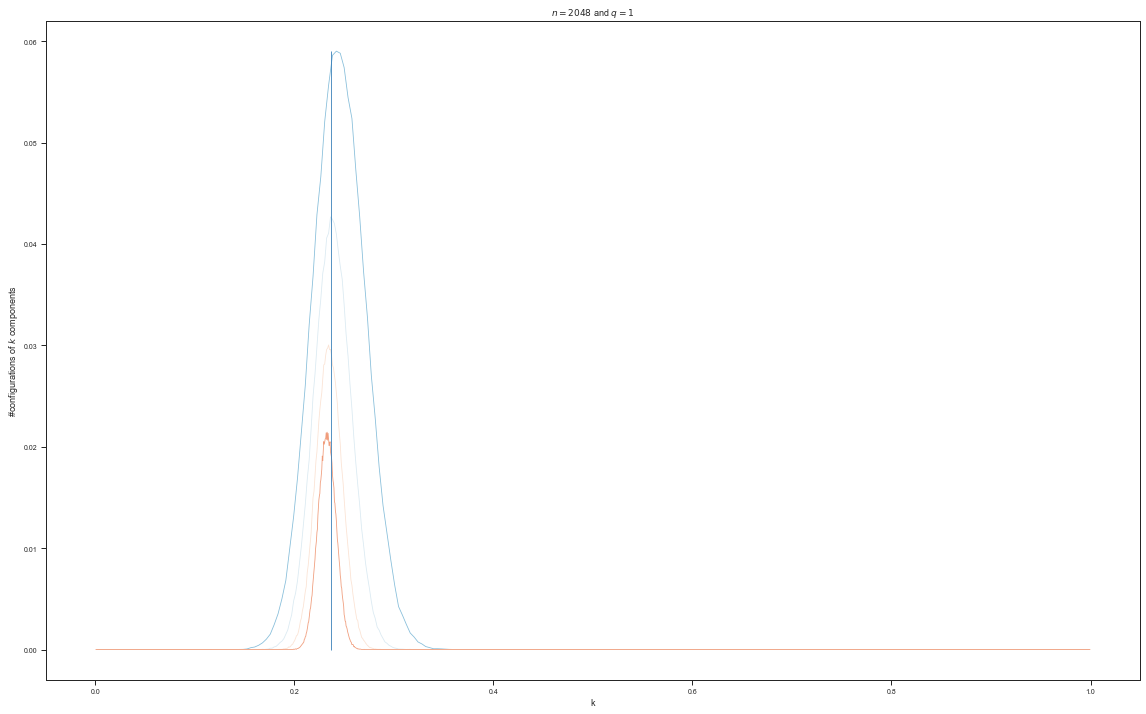

In [3]:
data_per_size = dict()

plt.figure(figsize=(16,10))
#fig, axs = plt.subplots(nrows=len(size_data[q]), sharex=True, dpi=300)
#axs_ = axs.flat

q = 1
top_list = []

max_value = 0
#n = 512
for n in size_data[q]:
    hist_arr = np.zeros(n-1)
    #for i, n in enumerate(size_data[q]):
    for data in SimDataIterator(q=q, n=n, name="components"):
        rate = data["measurements"][0]["rate"]
        #sweeps = int(10*q)
        #slice = int(2*n*sweeps/rate)
        # #samples_per_sweep = 64
        #print("using", slice, "of", len(data["measurements"][0]["data"]))
        continuous_data = data["measurements"][0]["data"]

        #continuous_data = data["measurements"][0]["data"][2*n*1000:2*n*2000]
        hist, bin_edges = np.histogram(continuous_data, bins=np.arange(n))

        hist_arr += hist
        #print(len(hist), bin_edges)
        #with plt.style.context('dark_background'):
        #uous_data))
            #time = data["time_flipping"]
            #print(time/data["iter"]*slice/1E9, "s")
            #plt.title("Thermalization for $q = {}$".format(q))
            #plt.set_title('$n = {}$'.format(n))
            #plt.plot(np.arange(0, len(continuous_data))*rate/(2*n), np.array(continuous_data)/continuous_data[0], label="$n = {}$".format(n))
            
            # #plt.label_outer()

    x = (np.arange(n-1)+1)/n

    plt.plot(x, hist_arr/np.sum(hist_arr))

    top = (x)[np.argmax(hist_arr)]
    if top > 0.1:
        top_list.append(top)
    max_value = max(max_value, np.max(hist_arr/np.sum(hist_arr)))
    
#plt.yscale("log")
plt.ylabel("#configurations of $k$ components")
plt.xlabel("k")
#plt.xlim(left=1000, right=2000)
plt.title("$n = {}$ and $q = {}$".format(n, q))
plt.tight_layout()
print(top_list[-1]-top_list)
plt.vlines(np.mean(top_list), 0, max_value)
#plt.savefig("phasetransistionq2n.pdf")
#plt.xlim(left=np.where(hist_arr != 0)[0][0], right=np.where(hist_arr != 0)[0][-1])

plt.show()


    # print(len(contin

<Figure size 1152x720 with 0 Axes>

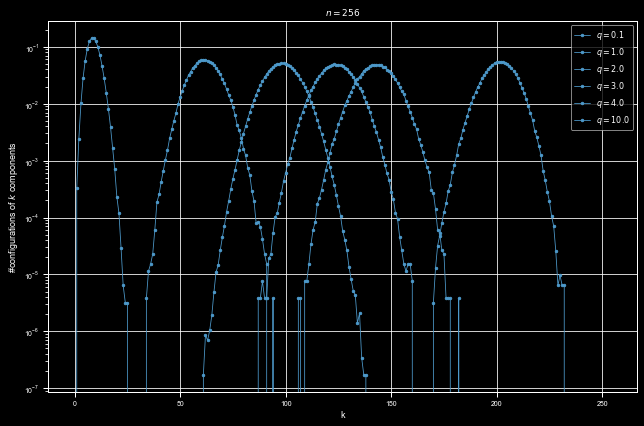

In [3]:
data_per_size = dict()

plt.figure(figsize=(16,10))
#fig, axs = plt.subplots(nrows=len(size_data[q]), sharex=True, dpi=300)
#axs_ = axs.flat

n = 256
q_list = [0.1, 1.0, 2.0, 3.0, 4.0, 10.0]
#n = 512
with plt.style.context('dark_background'):

    plt.figure(figsize=(9,6))
    for q in q_list:
        hist_arr = np.zeros(n-1)
        #for i, n in enumerate(size_data[q]):
        for data in SimDataIterator(q=q, n=n, name="components"):
            rate = data["measurements"][0]["rate"]
            #sweeps = int(10*q)
            #slice = int(2*n*sweeps/rate)
            # #samples_per_sweep = 64
            #print("using", slice, "of", len(data["measurements"][0]["data"]))
            continuous_data = data["measurements"][0]["data"]

            #continuous_data = data["measurements"][0]["data"][2*n*1000:2*n*2000]
            hist, bin_edges = np.histogram(continuous_data, bins=np.arange(n))

            hist_arr += hist
            #print(len(hist), bin_edges)
            #with plt.style.context('dark_background'):
            #uous_data))
                #time = data["time_flipping"]
                #print(time/data["iter"]*slice/1E9, "s")
                #plt.title("Thermalization for $q = {}$".format(q))
                #plt.set_title('$n = {}$'.format(n))
                #plt.plot(np.arange(0, len(continuous_data))*rate/(2*n), np.array(continuous_data)/continuous_data[0], label="$n = {}$".format(n))
                
                # #plt.label_outer()

        plt.plot(hist_arr/np.sum(hist_arr), label="$q = {}$".format(q), marker='.', color=colors['rbrblued'])
    #plt.yscale("log")
    plt.ylabel("#configurations of $k$ components")
    plt.xlabel("k")
    #plt.xlim(left=1000, right=2000)
    plt.title("$n = {}$".format(n))
    plt.tight_layout()
    plt.grid()
    
    #plt.savefig("phasetransistionq2n.pdf")
    #plt.xlim(left=np.where(hist_arr != 0)[0][0], right=np.where(hist_arr != 0)[0][-1])
    plt.legend()
    plt.yscale("log")
    plt.show()
    


    # print(len(contin

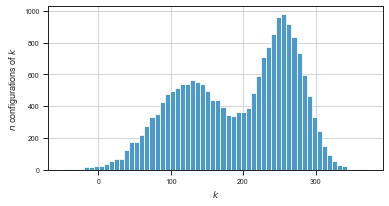

In [5]:
plt.figure(figsize=(6,3))

N = 10000
tot = np.zeros(2*N)
tot[0:N] = np.random.normal(256, 30, N)
tot[N:2*N] = np.random.normal(128, 50, N)

plt.hist(tot, bins=60, color=colors['rbrblued'])
plt.grid()

plt.xlabel("$k$")
plt.ylabel("$n$ configurations of $k$")

plt.savefig("docs/theory/assets/twopeakstructure.pdf", bbox_inches='tight')


In [34]:
q = 2.0
n = 512

for data in SimDataIterator(q=q, n=n, name="components"):
    print(data["measurements"][0].keys())
    #print(metadata_creator(data["measurements"][0]))

In [ ]:
n_batches = 100

n_ = 0

q = 2.0
n = 512

for data in SimDataIterator(q=q, n=n, name="components"):
    continuous_data = data["measurements"][0]["data"]
    rate = data["measurements"][0]["rate"]
    x, mean, err = batcher(continuous_data, 128, 8192, n_batches=128, log_scale=False)
    
    plt.plot(x, err)

    df = pd.read_csv("simdata/compcorrelation/report.csv")

    autocorrtime = int(np.round(df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]))
    gamma0 = df.loc[(df["q"] == q) & (df["n"] == n)]["gamma0"]

    error = float(np.sqrt(autocorrtime*2*2*gamma0/len(continuous_data*rate)))
    print(error, 1/np.sqrt(len(continuous_data))*np.std(continuous_data))

    
    n_ += 1
    if n_ % 7 == 0:
        break
    
plt.xscale('log')
plt.ylim(0.01, 0.08)

In [5]:
import re

class SimGroupedContinuousDataIterator(object):
    def __init__(self, q, n, measurement_id=0, name="default"):
        self.q = q
        self.n = n
        self.name = name
        self.paths = getsims(self.q, self.n, pre=self.name)
        self.pathdict = dict()
        self.measurement_id = measurement_id

        for path in self.paths:
            data = re.search("sim_data_(.+)_(\d+)_(\d+).json", path).groups()
            if not data[0] in self.pathdict:
                self.pathdict[data[0]] = dict()
            (self.pathdict[data[0]])[int(data[1])] = path
        

    def __iter__(self):
        return self

    def __next__(self):
        if len(self.pathdict) == 0:
            raise StopIteration
        groupedpaths = self.pathdict.popitem()
        #print("left =", len(groupedpaths))

        #print(groupedpaths)

        continuous_data_list = []

        

        rate_list = []

        cum_iterations = 0
        
        for key in dict(sorted(groupedpaths[1].items())):
            with open(groupedpaths[1][key]) as file:
                data = json.load(file)
                rate_list.append(data["measurements"][self.measurement_id]["rate"])
                cum_iterations += data["iter"]
                continuous_data_list.append(
                    np.array(data["measurements"][self.measurement_id]["data"])
                )

        metadata = {"rate": np.mean(rate_list), "total_iterations": cum_iterations}

        continuous_data = np.concatenate(continuous_data_list, axis=None)

        return continuous_data, metadata

# Test

data.shape = 1.34218e+08 27.0
data.shape = (67108864,)
comparison: 0.0005827758547238096 4.774099766327673 4.774099766327634 67108864
data.shape = (33554432,)
comparison: 0.0008211902885235937 4.756842192952738 4.756842192952727 33554432
data.shape = (16777216,)
comparison: 0.0011537463966119815 4.725745099684497 4.725745099684491 16777216
data.shape = (8388608,)
comparison: 0.0016113182080838451 4.666875755206476 4.66687575520648 8388608
data.shape = (4194304,)
comparison: 0.002224977744357931 4.556753877237549 4.556753877237553 4194304
data.shape = (2097152,)
comparison: 0.0030104339386039704 4.359572981308866 4.359572981308869 2097152
data.shape = (1048576,)
comparison: 0.003937649322544376 4.032150983604645 4.03215098360465 1048576
data.shape = (524288,)
comparison: 0.0049033879989923675 3.550428772635687 3.5504287726356925 524288
data.shape = (262144,)
comparison: 0.005754553740163272 2.946325895276842 2.946325895276849 262144
data.shape = (131072,)
comparison: 0.00638751824502793

/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_62516/3910342712.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return total_length_data / x
/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_62516/3910342712.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return total_length_data / x


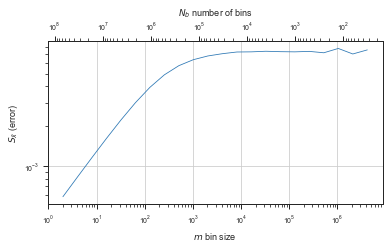

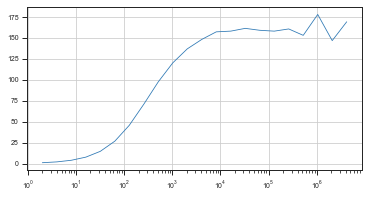

128


In [11]:
q = 1.0
n = 128

from scipy.stats import sem

for data, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="componentsfull2"):
    s = 1

    print("data.shape = {:g}".format(data.shape[0]), np.log2(data.shape[0]))

    #data_length = 10000000

    #data #= data[:data_length]
    total_length_data = len(data)

    bin_sizes = []
    mean = []
    error_list = []
    errorerror = []
    number_of_batches = []

    bin_size = 2

    while True:
        try:
            data = np.mean(data.reshape(-1,2), axis=1, dtype=np.longdouble)
            print("data.shape =", data.shape)
            bin_sizes.append(bin_size)
            
            bin_size = bin_size*2
            
            n_batches = data.shape[0]


            #print(data-np.mean(data))

            squared_sum = np.sum(np.square(data))/n_batches
            sum_squared = np.square(np.sum(data/n_batches))

            stddev1 = np.sqrt(squared_sum-sum_squared)
            err = (1/(np.sqrt(n_batches-1)))*stddev1

            stddev = np.std(data)
            print("comparison:" ,np.sum(err), np.sum(stddev), np.sum(stddev1), n_batches)
            #err = sem(data, ddof=1)
            
            #print(err)
            mean.append(np.mean(data))
            error_list.append(err)
            number_of_batches.append(n_batches)

            
            #errorerror.append(np.sqrt(2)*(err**2)/np.sqrt((n_batches-1)))
            errorerror.append(np.sqrt(1/2)*err/(n_batches-1))

        except:
            data = data[:-1]

        if data.shape[0] <= 32:
            break
        #print(data.shape)
    
    #print(bin_sizes, mean, error_list)

    #print(len(bin_sizes), len())

    fig, ax = plt.subplots(figsize=(6,3))

    ax.grid()
    ax.errorbar(x=bin_sizes, y=error_list)#, yerr=errorerror)
    ax.set_xscale('log', base=10)
    ax.set_yscale('log')

    ax.set_ylabel(r"$S_\bar{x}$ (error)")
    ax.set_xlabel("$m$ bin size")


    #ax.set_xticks([1,4, 16, 64, 256, 1024, 4096])
    #ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    

    #ax.set_xlabel(r"number of measurements every $2 \tau$")

    #plt.legend()
    #ax.grid()

    def forward(x):
        return total_length_data / x

    def inverse(x):
        return total_length_data / x

    #ax.set_ylabel("$S_{b}/S_{a}$")

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    
    secax.set_xlabel("$N_b$ number of bins")
    

    #secax.set_xticks([131072, 32768, 8192, 2048, 512, 128, 32, 8])
    #secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #secax.minorticks_off()

    fig.savefig("docs/results/assets/binning.pdf", bbox_inches='tight')

    plt.figure(figsize=(6,3))

    plt.grid()
    
    error_list = np.array(error_list)
    bin_sizes = np.array(bin_sizes)

    plt.errorbar(x=bin_sizes, y=(error_list/error_list[0])**2)
    plt.xscale('log', base=10)
    #plt.yscale('log')

    plt.show()

    df = pd.read_csv("simdata/compcorrelation/report.csv")

    autocorrtime = int(np.round(df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]))

    print(autocorrtime)

    break

    data_ = data[::s]
    print("total length:", len(data_))
    print("metadata (rate)", metadata["rate"])
    N = len(data_) * metadata["rate"] * s # factor 2 is for testing should be removed
    print("metadata (iterations)", metadata["total_iterations"], N)

    

    


    # calculating error by autocorrelation

    df = pd.read_csv("simdata/compcorrelation/report.csv")

    autocorrtime = int(np.round(df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]))
    gamma0 = df.loc[(df["q"] == q) & (df["n"] == n)]["gamma0"]

    error2 = np.std(data_)/np.sqrt(len(data_))

    error = float(np.sqrt(2*autocorrtime*gamma0/N))

    # batching method
    batches = spliterate(data, 1000)
    print(batches)

    means = []
    for batch in batches:
        means.append(np.mean(batch))
    #print(np.mean(batches, axis=1))
    print("mean:", np.mean(means), "std: ", np.std(means)/np.sqrt(len(means)-1))

    print("error by autocorrelation:", error)
    print("error by stddev:", error2)
    print("error by jackknife:", np.sqrt(jackknife_var(data, np.mean)))
    mean, std = bootstrap_estimate(data, lambda x: np.mean(x), p=0.005)
    print("error by stationary bootstrap:", std)

    #

    

    # batching

    x, mean, err = batcher(data, 64, 8192, n_batches=100, log_scale=True)

    # plotting the blocking procedure

    syserror = autocorrtime/x
    
    var = np.square(err)
    tauint = x * var / var[0]

    

    


    plt.plot(x, err)
    plt.xscale("log")
    plt.show()
    plt.plot(x, np.gradient(err))
    plt.xscale("log")
    plt.show()

    plt.plot(x, var)
    plt.xscale("log")
    plt.show()

    

    

    break

# Real

In [123]:
def batcher2(continuous_data, min_batch_size, max_batch_size, n_batches=100, log_scale=True, base=2):
    mean = np.zeros(n_batches)
    error = np.zeros(n_batches)
    erroroferror = np.zeros(n_batches)

    if log_scale:
        x = np.logspace(np.log2(min_batch_size), np.log2(max_batch_size), n_batches, dtype=int, base=2)
        print(x)
    else:
        x = np.linspace(min_batch_size, max_batch_size, n_batches, dtype=int)


    for i, chunk_size in enumerate(x):
        #print(i, chunk_size)
        means = []

        
        batches = spliterate(continuous_data, chunk_size)

        n_batches = 0
        for tmp in batches:
            n_batches += 1
            #print(tmp)
            means.append(np.mean(tmp))


        means = np.array(means)

        
        # mean = np.mean(means)

        squared_sum = np.sum(np.square(means))/n_batches
        sum_squared = np.square(np.sum(means/n_batches))

        err = (1/(np.sqrt(n_batches-1)))*np.sqrt(squared_sum-sum_squared) 

        mean[i] = np.mean(means)
        error[i] = err
        erroroferror[i] = err/(np.sqrt(2)*(n_batches-1))

    return x, mean, error, erroroferror

total length: 131072 50.0 %
metadata (rate) 2048.0
metadata (iterations) 536870912 268435456.0
autocorrtime: 1013
<generator object spliterate at 0x16ff05890>
n_batches = 128
mean: 239.3366470336914 std:  0.04957504503094731
error by autocorrelation: 0.03673844490607208
error by autocorrelation (corrected): 0.051956007046663887
error by stddev: 0.03705591696946066
error by jackknife: 0.037056058329234726
error by stationary bootstrap: 0.04526576834691454 p = 0.005
error by batching: 0.04957504503094731 with 128 batches
error by autocorrelation (pure): 0.05226425420005214
[   1    1    1    1    1    1    1    1    1    2    2    2    2    2
    3    3    3    4    4    4    5    5    6    6    7    8    8    9
   10   11   12   13   14   16   17   18   20   22   24   26   28   31
   34   37   40   43   47   51   56   61   66   72   78   85   93  101
  110  120  130  142  154  168  182  198  216  235  256  278  302  329
  358  389  423  460  501  545  593  645  701  763  830  902  981 1

/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_86117/250914841.py:116: RuntimeWarning: divide by zero encountered in true_divide
  return total_length_data / x
/var/folders/11/46j3b7qj57d234fkyfyj9pk80000gn/T/ipykernel_86117/250914841.py:116: RuntimeWarning: divide by zero encountered in true_divide
  return total_length_data / x


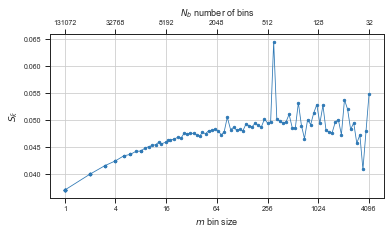

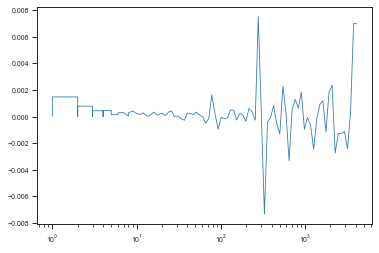

Markov Chain length:


In [19]:


q = 1.0
n = 1024



for data, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="components"):
    s = 1

    total_size = len(data)
    data = data[:131072]

    data_ = data[::s]
    print("total length:", len(data_), len(data_)/total_size*100, "%")
    print("metadata (rate)", metadata["rate"])
    N = len(data_) * metadata["rate"] * s # factor 2 is for testing should be removed
    print("metadata (iterations)", metadata["total_iterations"], N)

    

    

    # calculating error by autocorrelation

    df = pd.read_csv("simdata/compcorrelation/report.csv")



    autocorrtime = int(np.round(df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]))
    gamma0 = df.loc[(df["q"] == q) & (df["n"] == n)]["gamma0"]

    print("autocorrtime:", autocorrtime)

    error2 = np.std(data_)/np.sqrt(len(data_))

    error = float(np.sqrt(2*autocorrtime*gamma0/N))

    # batching method
    batches = spliterate(data, 1024)
    print(batches)

    means = []
    n_batches = 0
    for batch in batches:
        means.append(np.mean(batch))
        n_batches += 1
    print("n_batches =", n_batches)
    #print(np.mean(batches, axis=1))
    print("mean:", np.mean(means), "std: ", np.std(means)/np.sqrt(len(means)-1))

    print("error by autocorrelation:", error)
    print("error by autocorrelation (corrected):", np.sqrt(2) * error)
    print("error by stddev:", error2)
    print("error by jackknife:", np.sqrt(jackknife_var(data, np.mean)))
    p = 0.005#0.01#1/autocorrtime

    mean, std = bootstrap_estimate(data, lambda x: np.mean(x), p=p)
    print("error by stationary bootstrap:", std, "p =", p)
    standard_bootstrap_error = bootstrap_estimate(data, lambda x: np.mean(x), p=1)[1]
    
    #
    batch_mean, batch_err, numbatches = batching_error(data, 1024)
    print("error by batching:", batch_err, "with", numbatches, "batches")
    print("error by autocorrelation (pure):", error_by_autocorr(metadata["rate"], autocorrtime, data))
    
    datadict = {"Standard mean error": np.std(data)/np.sqrt(len(data)),
                "Autocorrelation": [error_by_autocorr(metadata["rate"], autocorrtime, data)],
                "Binning $(m = 1024)$": [batch_err],
                "Jackknife": [np.sqrt(jackknife_var(data, np.mean))], 
                "Bootstrap": [standard_bootstrap_error],
                "Stationary bootstrap $(p = 0.005)$": [std],
                }
    
    
    #print(pandasframe)

    # batching
    total_length_data = len(data)

    x, mean, err = batcher(data, 1, 4096, n_batches=100, log_scale=True)

    print("data length = ")

    # plotting the blocking procedure

    syserror = autocorrtime/x
    
    var = np.square(err)
    #tauint = x * var / var[0]

    

    fig, ax = plt.subplots(figsize=(6,3))
    ax.grid()
    ax.set_ylabel(r"$S_\bar{k}$")
    ax.set_xlabel(r"$m$ bin size")
    ax.errorbar(x, err, marker='.') #yerr=erroferr) #yerr=erroferr)
    ax.set_xscale("log", base=2)


    #ax.set_xlim(8192, 262144)
    #ax.set_xscale('log')

    ax.set_xticks([1,4, 16, 64, 256, 1024, 4096])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    

    #ax.set_xlabel(r"number of measurements every $2 \tau$")

    #plt.legend()
    #ax.grid()

    def forward(x):
        return total_length_data / x

    def inverse(x):
        return total_length_data / x

    #ax.set_ylabel("$S_{b}/S_{a}$")

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    
    secax.set_xlabel("$N_b$ number of bins")
    

    secax.set_xticks([131072, 32768, 8192, 2048, 512, 128, 32, 8])
    secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    secax.minorticks_off()
    fig.savefig("docs/results/assets/binningresults.pdf", bbox_inches='tight')

    plt.show()

    plt.figure()

    plt.plot(x, np.gradient(err))
    plt.xscale("log")


    plt.show()

    plt.plot(x, var)
    plt.xscale("log")
    plt.show()

    # plt.plot(x, tauint)
    # plt.xscale("log")
    # plt.show()

    print("Markov Chain length:", )

    

    break

pandasframe = pd.DataFrame(data=datadict)
    
    

In [20]:
N = 268435456.0
print("{:g}".format(N))

2.68435e+08


In [21]:

style = pandasframe.T.style.hide(axis="columns").format(precision=3)
style = style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    #{'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False).applymap_index(
    lambda v: "font-weight: bold;", axis="index"
)
#column_format="rrrrr")
print(style.to_latex(column_format="|c|c|", convert_css=True))
style

\begin{tabular}{|c|c|}
\hline
\bfseries Standard mean error & 0.037 \\
\bfseries Autocorrelation & 0.052 \\
\bfseries Binning $(m = 1024)$ & 0.050 \\
\bfseries Jackknife & 0.037 \\
\bfseries Bootstrap & 0.039 \\
\bfseries Stationary bootstrap $(p = 0.005)$ & 0.045 \\
\hline
\end{tabular}



In [7]:
def error_by_autocorr(rate, autocorrtime, data):
    return np.sqrt(1+2*autocorrtime/rate)*np.std(data)/np.sqrt(len(data)-1)



len = 262144 256 1.0
len = 262144 512 1.0
len = 262144 1024 1.0
len = 262144 2048 1.0
len = 262144 4096 1.0
len = 262144 8192 1.0
len = 524288 256 2.0
len = 524288 256 2.0
len = 4194304 256 2.0
len = 524288 256 2.0
len = 524288 512 2.0
len = 4194304 512 2.0
len = 524288 512 2.0
len = 524288 512 2.0
len = 327680 1024 2.0
len = 524288 1024 2.0
len = 4194304 1024 2.0
len = 327680 1024 2.0
len = 131072 2048 2.0
len = 131072 2048 2.0
len = 524288 2048 2.0
len = 4194304 2048 2.0
len = 393216 4096 2.0
len = 2097152 4096 2.0
len = 98304 8192 2.0
len = 131072 8192 2.0
len = 786432 8192 2.0
len = 262144 256 2.5
len = 262144 512 2.5
len = 262144 1024 2.5
len = 262144 2048 2.5
len = 262144 4096 2.5
len = 262144 8192 2.5
len = 262144 256 3.0
len = 262144 512 3.0
len = 262144 1024 3.0
len = 262144 2048 3.0
len = 262144 4096 3.0
len = 262144 8192 3.0
len = 49152 256 0.4
len = 49152 512 0.4
len = 49152 1024 0.4
len = 49152 2048 0.4
len = 49152 4096 0.4
len = 49152 8192 0.4


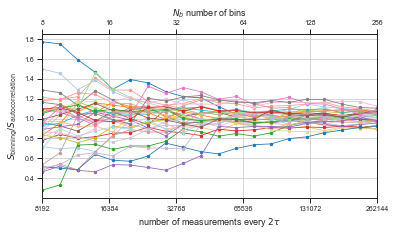

In [75]:

sns.set_palette(sns.color_palette("tab20"))

# size_data = {1.0: [256, 512, 1024, 2048, 4096, 8192],
#              2.0: [256, 512, 1024, 2048, 4096, 8192],
#              3.0: [256, 512, 1024, 2048, 4096, 8192],
#              0.4: [256, 512, 1024, 2048, 4096, 8192]}

size_data = {1.0: [256, 512, 1024, 2048, 4096, 8192],
             2.0: [256, 512, 1024, 2048, 4096, 8192],
             2.5: [256, 512, 1024, 2048, 4096, 8192],
             3.0: [256, 512, 1024, 2048, 4096, 8192],
             0.4: [256, 512, 1024, 2048, 4096, 8192],
             0.4: [256, 512, 1024, 2048, 4096, 8192]}

fig, ax = plt.subplots(figsize=(6,3))

batch_size = 1024

for q in size_data.keys():
    for n in size_data[q]:

        for data_, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="components"):
            print("len =", len(data_), n, q)
            if len(data_) < 262144:
                continue
            
            x = np.logspace(np.log2(8192), np.log2(262144), 20, dtype=int, base=2)
            #print(x)
            err_batch_list = np.zeros(len(x))
            err_autocorr_list = np.zeros(len(x))
            n_batches = np.zeros(len(x))

            for (i, cutoff) in enumerate(x):
                #print(i, cutoff)
                data = data_[:cutoff]

                df = pd.read_csv("simdata/compcorrelation/report.csv")

                autocorrtime = df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]

                err_by_autocorr = error_by_autocorr(metadata["rate"], autocorrtime, data)

                batch_mean, batch_err, numbatches = batching_error(data, batch_size)
                #print("error by batching:", batch_err, "with", numbatches, "batches")
                #print("error by autocorr:", err_by_autocorr)



                err_batch_list[i] = batch_err
                err_autocorr_list[i] = err_by_autocorr

            ax.plot(x, err_batch_list/err_autocorr_list, marker='.', label="$q = {}, n = {}, t = {}$".format(q, n, len(data_)))
            #plt.plot(x, )
ax.set_xlim(8192, 262144)
ax.set_xscale('log', base=2)

ax.set_xticks([8192,16384, 32768, 65536, 131072, 262144])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel(r"number of measurements every $2 \tau$")

#plt.legend()
ax.grid()

def forward(x):
    return x / batch_size

def inverse(x):
    return x / batch_size

ax.set_ylabel(r"$S_{\mathrm{binning}}/S_{\mathrm{autocorrelation}}$")

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel("$N_b$ number of bins")


secax.set_xticks([8, 16,32, 64, 128, 256, 512])
secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
secax.minorticks_off()

fig.savefig("docs/results/assets/autocorrvscomp.pdf",  bbox_inches='tight')


len = 262144 8192 1.0


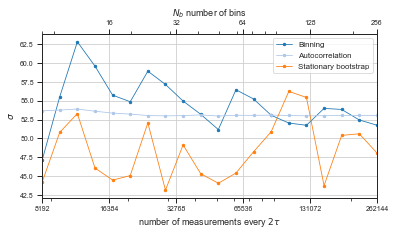

In [26]:
sns.set_palette(sns.color_palette("tab20"))

size_data = {1.0: [8192]}#, 512, 1024, 2048, 4096, 8192],
             #2.0: [256, 512, 1024, 2048, 4096, 8192],
             #3.0: [256, 512, 1024, 2048, 4096, 8192],
             #0.4: [256, 512, 1024, 2048, 4096, 8192]}

fig, ax = plt.subplots(figsize=(6,3))


batch_size = 1024

for q in size_data.keys():
    for n in size_data[q]:

        for data_, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="components"):
            print("len =", len(data_), n, q)
            if len(data_) < 262144:
                continue
            
            x = np.logspace(np.log2(8192), np.log2(262144), 20, dtype=int, base=2)
            #print(x)
            err_batch_list = np.zeros(len(x))
            err_autocorr_list = np.zeros(len(x))
            #err_jackknife_list = np.zeros(len(x))
            err_bootstrap_list = np.zeros(len(x))
            n_batches = np.zeros(len(x))

            for (i, cutoff) in enumerate(x):
                #print(i, cutoff)
                data = data_[:cutoff]

                df = pd.read_csv("simdata/compcorrelation/report.csv")

                autocorrtime = df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]

                err_by_autocorr = error_by_autocorr(metadata["rate"], autocorrtime, data)

                batch_mean, batch_err, numbatches = batching_error(data, batch_size)
                #print("error by batching:", batch_err, "with", numbatches, "batches")
                #print("error by autocorr:", err_by_autocorr)

                err_bootstrap_list[i] = bootstrap_estimate(data, lambda x: np.mean(x), p=0.005)[1]

                err_batch_list[i] = batch_err
                err_autocorr_list[i] = err_by_autocorr

            ax.plot(x, err_batch_list * np.sqrt(x), marker='.', label="Binning".format(q, n, len(data_)))
            ax.plot(x, err_autocorr_list * np.sqrt(x), marker='.', label="Autocorrelation".format(q, n, len(data_)))
            ax.plot(x, err_bootstrap_list * np.sqrt(x), marker='.', label="Stationary bootstrap".format(q, n, len(data_)))

            #plt.plot(x, )
ax.set_xlim(8192, 262144)
ax.set_xscale('log')

ax.legend()

ax.set_xticks([8192,16384, 32768, 65536, 131072, 262144])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel(r"number of measurements every $2\tau$")

#plt.legend()
ax.grid()

def forward(x):
    return x / batch_size

def inverse(x):
    return x / batch_size

ax.set_ylabel("$\sigma$")

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel("$N_b$ number of bins")

secax.set_xticks([8, 16,32, 64, 128, 256, 512])
secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig("docs/results/assets/autocorrvscompv2.pdf",  bbox_inches='tight')


In [6]:
sns.set_palette(sns.color_palette("tab20"))

size_data = {1.0: [256, 512, 1024, 2048, 4096, 8192],
             2.0: [256, 512, 1024, 2048, 4096, 8192],
             2.5: [256, 512, 1024, 2048, 4096, 8192],
             3.0: [256, 512, 1024, 2048, 4096, 8192],
             0.4: [256, 512, 1024, 2048, 4096, 8192],
             0.4: [256, 512, 1024, 2048, 4096, 8192]}

#fig, ax = plt.subplots(figsize=(6,3))

relative_err_list = []
cutoff_list = []
n_list = []
q_list = []

batching_size = 1024

for q in size_data.keys():
    for n in size_data[q]:

        



        for data_, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="components"):
            print("len =", len(data_), n, q)
            if len(data_) < 262144:
                continue
            
            x = np.logspace(np.log2(8192), np.log2(262144), 20, dtype=int, base=2)
            #print(x)
            err_batch_list = np.zeros(len(x))
            err_autocorr_list = np.zeros(len(x))
            n_batches = np.zeros(len(x))

            



            for (i, cutoff) in enumerate(x):
                #print(i, cutoff)
                data = data_[:cutoff]

                df = pd.read_csv("simdata/compcorrelation/report.csv")

                autocorrtime = df.loc[(df["q"] == q) & (df["n"] == n)]["mean"]

                err_by_autocorr = error_by_autocorr(metadata["rate"], autocorrtime, data)

                batch_mean, batch_err, numbatches = batching_error(data, batching_size)
                #print("error by batching:", batch_err, "with", numbatches, "batches")
                #print("error by autocorr:", err_by_autocorr)

                err_batch_list[i] = batch_err
                err_autocorr_list[i] = err_by_autocorr
                
                relative_err_list.append(float(batch_err/err_by_autocorr))
                cutoff_list.append(cutoff)

                q_list.append(n)
                n_list.append(q)



            #ax.plot(x, err_batch_list/err_autocorr_list, marker='.', label="$q = {}, n = {}, t = {}$".format(q, n, len(data_)))
            #plt.plot(x, )


d = {'x':cutoff_list, 'y':relative_err_list, 'n':n_list, 'q':q_list}
df = pd.DataFrame(data=d)

# ax.set_xlim(8192, 262144)
# ax.set_xscale('log')

# ax.set_xticks([8192,16384, 32768, 65536, 131072, 262144])
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ax.set_xlabel(r"number of measurements every $2 \tau$")

# #plt.legend()
# ax.grid()

# def forward(x):
#     return x / 512

# def inverse(x):
#     return x / 512

# ax.set_ylabel("$S_{b}/S_{a}$")

# secax = ax.secondary_xaxis('top', functions=(forward, inverse))
# secax.set_xlabel("$N_b$ bin size")

# secax.set_xticks([16,32, 64, 128, 256, 512])
# secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# fig.savefig("docs/results/assets/autocorrvscomprel.pdf",  bbox_inches='tight')


len = 262144 256 1.0


NameError: name 'error_by_autocorr' is not defined

In [82]:
df.groupby(['n']).groups.keys(), df.groupby(['q']).groups.keys()

(dict_keys([1.0, 2.0, 2.5, 3.0]),
 dict_keys([256, 512, 1024, 2048, 4096, 8192]))

In [87]:
len(df.groupby(['n', 'q']).groups)

24

[ 84.  92.  95. 100. 100.]


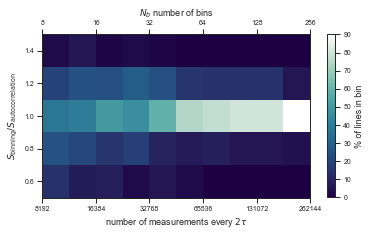

In [65]:
# for name, group in df.groupby('x'):
#     hist, bin_edges = np.histogram(group['y'].values)
#     plt.plot(bin_edges, hist)
fig, ax = plt.subplots(figsize=(6,3))



# https://stackoverflow.com/questions/63415624/normalising-a-2d-histogram
bin_edges_y = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]
bin_edges_x = np.logspace(np.log2(8192), np.log2(262144), 11, dtype=int, base=2)

#print(df['y'])

#plot = ax.hist2d(,cmap='Blues') #cmap='cmr.ocean_r')
norm = 100
hist, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=[bin_edges_x, bin_edges_y])
hist = hist.T
hist *= norm / hist.sum(axis=0, keepdims=True)
image = ax.pcolormesh(xedges, yedges, hist, cmap='cmr.ocean')

with np.printoptions(precision=0, suppress=True):
    print(np.mean((hist[1]+hist[2]+hist[3]).reshape(5,2), axis=1))


#print(plot)

ax.set_xlim(8192, 262144)
ax.set_xscale('log', base=2)

ax.set_xticks([8192,16384, 32768, 65536, 131072, 262144])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel(r"number of measurements every $2\tau$")

#plt.legend()
ax.grid()

def forward(x):
    return x / batching_size

def inverse(x):
    return x / batching_size

ax.set_ylabel(r"$S_{\mathrm{binning}}/S_{\mathrm{autocorrelation}}$")



secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel("$N_b$ number of bins")
secax.minorticks_off()

secax.set_xticks([8, 16,32, 64, 128, 256, 512])
secax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

bar = fig.colorbar(image)
bar.set_label("% of lines in bin")



fig.savefig("docs/results/assets/autocorrvsbinscompfancyplot.pdf",  bbox_inches='tight')


In [8]:
size_data = {0.1: [256, 512, 1024, 2048, 4096, 8192, 16384],
             0.2: [256, 512, 1024, 2048, 4096, 8192, 16384],
             0.4: [256, 512, 1024, 2048, 4096, 8192, 16384],
             0.6: [256, 512, 1024, 2048, 4096, 8192, 16384],
             0.8: [256, 512, 1024, 2048, 4096, 8192, 16384],
             1.0: [256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 655356, 131072, 262144],
             1.5: [256, 512, 1024, 2048, 4096, 8192, 16384],
             1.6: [256, 512, 1024, 2048, 4096, 8192, 16384],
             1.7: [256, 512, 1024, 2048, 4096, 8192, 16384],
             1.8: [256, 512, 1024, 2048, 4096, 8192, 16384],
             1.9: [256, 512, 1024, 2048, 4096, 8192, 16384],
             2.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384],
             2.1: [256, 512, 1024, 2048, 4096, 8192, 16384],
             2.2: [256, 512, 1024, 2048, 4096, 8192, 16384],
             2.3: [256, 512, 1024, 2048, 4096, 8192, 16384],
             2.4: [256, 512, 1024, 2048, 4096, 8192, 16384],
             2.5: [256, 512, 1024, 2048, 4096, 8192, 16384],
             3.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             4.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             5.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             6.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             7.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             8.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             9.0: [256, 512, 1024, 2048, 4096, 8192, 16384],
             10.0: [256, 512, 1024, 2048, 4096, 8192, 16384]}

def data_to_std_err(data, batch_size, function=np.mean):
    batches = spliterate(data, batch_size)
    #print(batches)

    means = []
    for batch in batches:
        means.append(function(batch))
    #print(np.mean(batches, axis=1))
    std_err = np.std(means)/np.sqrt(len(means)-1)

    mean = function(data)

    return std_err, len(means), mean


mean_list = []
mean_pow4_list = []
mean_pow2_list = []
mean2_error_list = []
mean4_error_list = []
binder_list = []
binder_error_list = []
error_list = []
error_batch_list = []
q_list = []
n_list = []
n_chunks_list = []
stddev_list = []

for q in size_data.keys():
    for n in size_data[q]:
        
        for data, metadata in SimGroupedContinuousDataIterator(q=q, n=n, name="components"):
            #print("n:", n)
            #data = data-n

            q_list.append(q)
            n_list.append(n)

            data_pow2 = np.power(data, 2)
            data_pow4 = np.power(data, 4)

            mean_pow2 = np.mean(data_pow2)
            mean_pow4 = np.mean(data_pow4)

            #mean_pow2_list.append(np.mean(data_pow2))
            mean_pow2_list.append(mean_pow2)
            mean_pow4_list.append(mean_pow4)

            binder_list.append(1-mean_pow4/(3*(mean_pow2**2)))

            #print(np.mean(binder), binder_list[-1])

            batches = spliterate(data, 1000)
            #print(batches)

            std_err, n_chunks, _ = data_to_std_err(data, 1000)
            std_err_mean2, _, _ = data_to_std_err(data_pow2, 1000)
            std_err_mean4, _, _ = data_to_std_err(data_pow4, 1000)

            std_err_binder, _, mean = data_to_std_err(data, 1000, lambda x: 1-np.mean(np.power(x, 4))/(3*(np.mean(np.power(x, 2))**2)))

            #print(mean)

            mean2_error_list.append(std_err_mean2)
            mean4_error_list.append(std_err_mean4)

            binder_error_list.append(std_err_binder)
            
            #print("mean:", np.mean(means), "std: ", )

            mean_list.append(np.mean(data))
            error_list.append(np.std(data)/np.sqrt(len(data)))
            error_batch_list.append(std_err)
            n_chunks_list.append(n_chunks)
            stddev_list.append(np.std(data))

            
d = {'n': n_list, 'q': q_list, 'mean': mean_list, 'error': error_list, 'mean2': mean_pow2_list, 'mean4': mean_pow4_list, 'batch_error': error_batch_list, 'n_chunks': n_chunks, 'stddev': stddev_list, 'mean2_error': mean2_error_list, 'mean4_error': mean4_error_list, 'binder': binder_list, 'binder_error': binder_error_list}
df = pd.DataFrame(data=d)
            


In [4]:
df

n     q         mean     error         mean2         mean4  \
0      256   0.1  -247.050130  0.012480  6.104142e+04  3.727918e+09   
1      256   0.1  -247.049065  0.005406  6.104090e+04  3.727856e+09   
2      512   0.1  -495.325236  0.017516  2.453622e+05  6.021737e+10   
3      512   0.1  -495.334702  0.007596  2.453716e+05  6.022204e+10   
4     1024   0.1  -991.980855  0.024591  9.840557e+05  9.684826e+11   
..     ...   ...          ...       ...           ...           ...   
218   1024  10.0  -224.581196  0.029029  5.065762e+04  2.611001e+09   
219   2048  10.0  -451.578756  0.095654  2.043731e+05  4.213592e+10   
220   4096  10.0  -905.580566  0.135008  8.209721e+05  6.769389e+11   
221   8192  10.0 -1814.610718  0.191841  3.294621e+06  1.087836e+13   
222  16384  10.0 -3632.278849  0.274077  1.319714e+07  1.743595e+14   

     batch_error  n_chunks     stddev  mean2_error   mean4_error    binder  \
0       0.017239        50   2.766929     8.504134  1.035178e+06  0.666500   
1       0.006487        50   2.768127     3.199592  3.893516e+05  0.666500   
2       0.019298        50   3.883451    19.110927  9.373487e+06  0.666585   
3       0.009795        50   3.889160     9.694425  4.749668e+06  0.666585   
4       0.032483        50   5.451910    64.426558  1.267359e+08  0.666626   
..           ...       ...        ...          ...           ...       ...   
218     0.051685        50  14.862945    23.281403  2.399204e+06  0.660847   
219     0.174775        50  21.206736   157.289649  6.411262e+07  0.663733   
220     0.239226        50  29.931692   433.759129  7.159775e+08  0.665211   
221     0.396868        50  42.531734  1441.594042  9.527459e+09  0.665935   
222     0.539201        50  60.763649  3907.192980  1.026782e+11  0.666294   

     binder_error  
0    1.121670e-06  
1    4.670221e-07  
2    5.253126e-07  
3    2.419043e-07  
4    3.070614e-07  
..            ...  
218  1.801214e-05  
219  1.998097e-05  
220  9.543884e-06  
221  4.099599e-06  
222  2.612364e-06  

[223 rows x 13 columns]

In [10]:
grouped = df.groupby(['n'])#.mean()
grouped

In [47]:
df

n     q          mean     error         mean2         mean4  \
0      256   0.1      8.949870  0.012480  8.775606e+01  1.052158e+04   
1      256   0.1      8.950935  0.005406  8.778177e+01  1.053790e+04   
2      512   0.1     16.674764  0.017516  2.931289e+02  1.041553e+05   
3      512   0.1     16.665298  0.007596  2.928577e+02  1.039523e+05   
4     1024   0.1     32.019145  0.024591  1.054949e+03  1.240123e+06   
..     ...   ...           ...       ...           ...           ...   
218   1024  10.0    799.418804  0.029029  6.392913e+05  4.092577e+11   
219   2048  10.0   1596.421244  0.095654  2.549011e+06  6.502038e+12   
220   4096  10.0   3190.419434  0.135008  1.017967e+07  1.036622e+14   
221   8192  10.0   6377.389282  0.191841  4.067290e+07  1.654579e+15   
222  16384  10.0  12751.721151  0.274077  1.626101e+08  2.644444e+16   

     batch_error  n_chunks     stddev  binder_error    binder  
0       0.017239        50   2.766929  1.808356e-17  0.544587  
1       0.006487        50   2.768127  6.962518e-18  0.544148  
2       0.019298        50   3.883451  1.808356e-17  0.595943  
3       0.009795        50   3.889160  6.962518e-18  0.595983  
4       0.032483        50   5.451910  1.808356e-17  0.628567  
..           ...       ...        ...           ...       ...  
218     0.051685        50  14.862945  6.962518e-18  0.666206  
219     0.174775        50  21.206736  1.808356e-17  0.666432  
220     0.239226        50  29.931692  1.808356e-17  0.666549  
221     0.396868        50  42.531734  1.808356e-17  0.666607  
222     0.539201        50  60.763649  1.808356e-17  0.666636  

[223 rows x 11 columns]

In [6]:
sns.set_palette(sns.color_palette("tab20"))
plt.figure(figsize=(6,3))

for name, group in grouped:
    if not (name in [256, 512, 1024, 2048, 4096, 8192, 16384]):
        continue

    #print(name, group)
    grouped_q = group.groupby(['q'])

    print(name, type(name))
    means = grouped_q.mean()

    n = name

    print(means)
    print(means["mean"].index.values)
    
    k = means["mean"].values

    k_2 = means["mean2"].values
    k_4 = means["mean4"].values

    #### REALLY BAD THIS IS NOT HOW AN ERROR SHOULD BE AVERAGED, CHANGE TO WEIGHTED AVERAGE
    error = means["batch_error"].values
    stddev = means["stddev"].values

    #np.power(k, 4)/

    plt.errorbar(x=means["mean"].index.values, y=k/(n), yerr=error/(n), label="$n = {}$".format(name), fmt='.')
    #plt.plot(means["mean"].index.values, 1-k_4/(k_2**2), label="$n = {}$".format(name))
    #plt.plot(means["mean"].index.values, 1-k_4/(k_2**2), label="$n = {}$".format(name))
    #sem = grouped_q.sem()

    #print(means["n"], means["mean"])
plt.legend()
plt.grid()
plt.ylabel(r"$\bar{k}/n$")
plt.xlabel("$q$")

#plt.savefig("docs/results/assets/componentsbyq.pdf", bbox_inches='tight')

plt.show()



256 <class 'int'>
          n        mean     error         mean2         mean4  batch_error  \
q                                                                            
0.1   256.0 -247.049597  0.008943  61041.162796  3.727887e+09     0.011863   
0.2   256.0 -239.626709  0.017063  57435.269531  3.302087e+09     0.020358   
0.4   256.0 -226.231466  0.022646  51205.883769  2.627186e+09     0.033238   
0.8   256.0 -203.796204  0.028764  41573.558940  1.735102e+09     0.039426   
1.0   256.0 -194.290554  0.013130  37794.014622  1.435198e+09     0.016914   
1.5   256.0 -174.096035  0.014387  30363.688519  9.285219e+08     0.018735   
1.6   256.0 -170.522893  0.029116  29133.615219  8.552229e+08     0.035548   
1.7   256.0 -167.086098  0.029419  27974.484612  7.889018e+08     0.043359   
1.8   256.0 -163.810066  0.029729  26891.658302  7.293695e+08     0.039692   
1.9   256.0 -160.675522  0.030015  25875.664368  6.756441e+08     0.037221   
2.0   256.0 -157.636255  0.008953  24908.98049

# Binder

256 <class 'int'>
          n        mean     error         mean2         mean4  batch_error  \
q                                                                            
0.1   256.0    8.950403  0.008943     87.768916  1.052974e+04     0.011863   
0.2   256.0   16.373291  0.017063    282.394531  9.622451e+04     0.020358   
0.4   256.0   29.768534  0.022646    911.373352  9.236959e+05     0.033238   
0.8   256.0   52.203796  0.028764   2765.902690  8.101618e+06     0.039426   
1.0   256.0   61.709446  0.013130   3853.250950  1.554564e+07     0.016914   
1.5   256.0   81.903965  0.014387   6762.518597  4.720094e+07     0.018735   
1.6   256.0   85.477107  0.029116   7361.893865  5.583384e+07     0.035548   
1.7   256.0   88.913902  0.029419   7962.402580  6.520542e+07     0.043359   
1.8   256.0   92.189934  0.029729   8556.904396  7.520504e+07     0.039692   
1.9   256.0   95.324478  0.030015   9145.797180  8.580430e+07     0.037221   
2.0   256.0   98.363745  0.008953   9735.21816

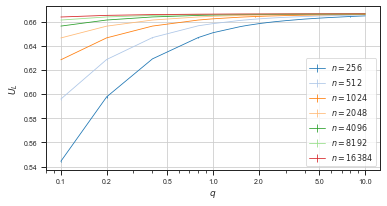

In [11]:
sns.set_palette(sns.color_palette("tab20"))
fig, ax = plt.subplots(figsize=(6,3))
import matplotlib

for name, group in grouped:
    if not (name in [256, 512, 1024, 2048, 4096, 8192, 16384]):
        continue

    #print(name, group)
    grouped_q = group.groupby(['q'])

    print(name, type(name))
    means = grouped_q.mean()

    n = name

    print(means)
    print(means["mean"].index.values)
    
    k = means["mean"].values

    k_2 = means["mean2"].values
    k_4 = means["mean4"].values

    #### REALLY BAD THIS IS NOT HOW AN ERROR SHOULD BE AVERAGED, CHANGE TO WEIGHTED AVERAGE
    error = means["batch_error"].values
    stddev = means["stddev"].values

    #np.power(k, 4)/

    #plt.errorbar(x=means["mean"].index.values, y=k/(n), yerr=error/(n), label="$n = {}$".format(name), fmt='.')
    #plt.plot(means["mean"].index.values, 1-k_4/(k_2**2), label="$n = {}$".format(name))
    ax.errorbar(means["mean"].index.values, 1-k_4/(3*k_2**2), yerr=means["binder_error"].values, label="$n = {}$".format(name))
    #sem = grouped_q.sem()

    #print(means["n"], means["mean"])
ax.legend()
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([0.1, 0.2, 0.5, 1, 2, 5, 10])
ax.grid()
ax.set_ylabel(r"$U_L$")
ax.set_xlabel("$q$")
fig.savefig("docs/results/assets/bindercumulant.pdf", bbox_inches='tight')

plt.show()




0        256
1        512
2       1024
3       2048
4       4096
5       8192
6      16384
7      16384
8      32768
9     131072
10    262144
Name: n, dtype: int64


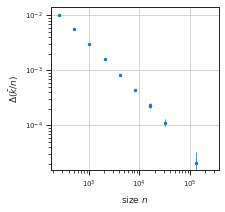

In [24]:
sns.set_palette(sns.color_palette("tab20"))
#plt.figure(figsize=(6,3))

plt.figure(figsize=(3,3))

subgroup = df[df["q"] == 1]

subgroup.groupby(["n"]).mean()

conv = np.array(subgroup["mean"]/subgroup["n"])
converror = np.array(subgroup["batch_error"]/subgroup["n"])

plt.errorbar(x=subgroup["n"], y=conv-conv[-1], yerr=np.sqrt(converror**2+converror[-1]**2), fmt='.')
plt.yscale("log")
plt.grid()
plt.xscale("log")

plt.ylabel(r"$\Delta (\bar{k}/n)$")
plt.xlabel(r"size $n$")

plt.savefig("docs/results/assets/convergencecomponents.pdf", bbox_inches='tight')

print(subgroup["n"])

# for name, group in grouped:
#     #print(name, group)
#     n = name
#     subgroup = group[group["q"] == 1]

#     print(subgroup/n)


In [ ]:


df = pd.read_json("simdata/stringsusceptibility/q1.0000/n128/sim_data_20220415080937_478985597_97_100.json", orient='split')
df

In [ ]:
df

In [ ]:
with open('simdata/stringsusceptibility/q1.0000/n128/sim_data_20220415080937_478985597_97_100.json') as file:
    d = json.load(file)
    df = pd.json_normalize(d,record_path=['measurements', 'data'])
    df = df.rename(columns={0: "x", 1: "y", 2: "y_sq"})
    N = d["n"]
    n_indep = d["measurements"][0]["metadata"]["n_independent"]

In [ ]:
y = df["y"]/n_indep

In [ ]:
plt.scatter(df["x"], y)
plt.show()
df["n"] = df["x"]/2

n = df["n"]

plt.scatter(n*(1-n/N), y)
plt.loglog()